# Implementing K-means Clustering algorithm 

## Import preliminary libraries

In [235]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Loading the dataset 

In [237]:
df = pd.read_csv("income.csv")

In [238]:
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


## Deleteing the "Name" column
**The "Name" column is of no consequence to our algorithm. Hence, it can be dropped**

In [240]:
del df["Name"]

In [241]:
df.head()

,Age,Income($)
0,27,70000
1,29,90000
2,29,61000
3,28,60000
4,42,150000


## Renaming the columns

In [243]:
df.rename(columns={"Age": "age", "Income($)": "income"}, inplace=True)

In [244]:
df.head()

,age,income
0,27,70000
1,29,90000
2,29,61000
3,28,60000
4,42,150000


## General observation

In [246]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     22 non-null     int64
 1   income  22 non-null     int64
dtypes: int64(2)
memory usage: 484.0 bytes


## Statistical Summary

In [248]:
df.describe()

,age,income
count,22.000000,22.000000
mean,34.818182,90431.818182
std,5.901060,43505.964412
min,26.000000,45000.000000
25%,29.000000,58500.000000
50%,36.500000,67500.000000
75%,39.750000,135250.000000
max,43.000000,162000.000000


## Visualization

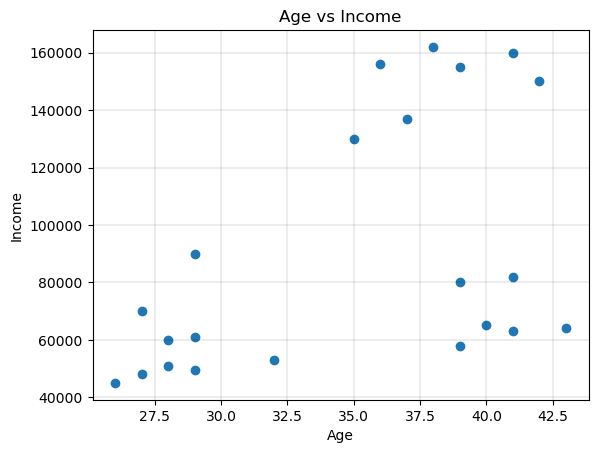

In [250]:
plt.scatter(df.age, df.income)
plt.xlabel("Age")
plt.ylabel("Income")
plt.title("Age vs Income")
plt.grid(True, linewidth=0.1, color='black')
plt.show()

## Plotting Elbow and Silhouette plots

In [252]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

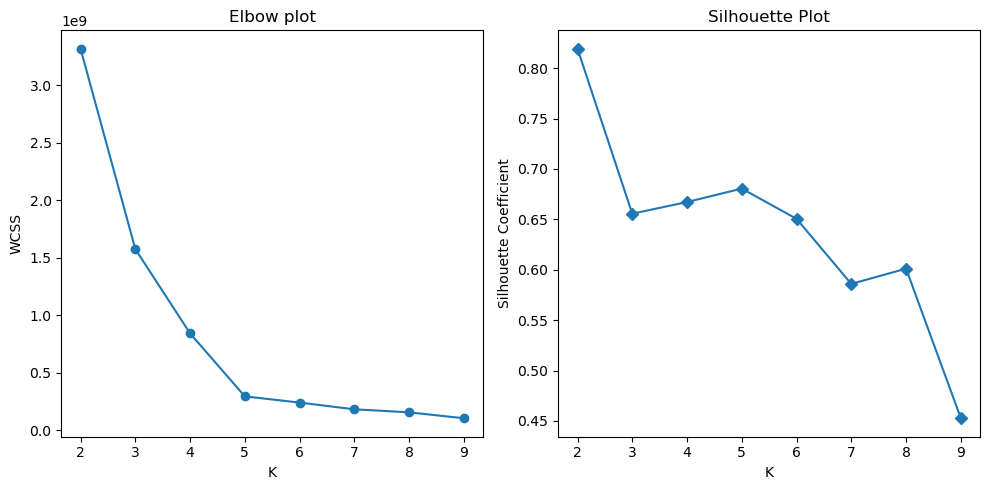

In [253]:
k_range = range(2,10)
sse = []
s_score = []
cols = df[["age", "income"]]

for k in k_range:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(cols)
    sse.append(kmeans.inertia_)

    labels = kmeans.labels_
    silhouette_avg = silhouette_score(cols,labels)
    s_score.append(silhouette_avg)

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,5))
ax1.plot(k_range,sse, marker="o")
ax1.set_xlabel("K")
ax1.set_ylabel("WCSS")
ax1.set_title("Elbow plot")

ax2.plot(k_range,s_score, marker="D")
ax2.set_xlabel("K")
ax2.set_ylabel("Silhouette Coefficient")
ax2.set_title("Silhouette Plot")

plt.tight_layout()

In [254]:
# From the elbow plot, the value of k appears to be 3. Because there is the sharpest decline from 2 to 3
# From the silhouette plot, the value of k appears to be 2 or 4
# So, ideally we should take the value k as k-1, k, and k+1
# So, we should take the values of k as 2,3,4,5,6
# But earlier from the scatter plot, it appeared that the ideal value of k=3
# Let us first run the algorithm on k=3 and observe the performance

## Implementing the model

In [256]:
km = KMeans(n_clusters=3)
cols=df[["age", "income"]]
y_predict = km.fit_predict(cols)

In [257]:
df["cluster"] = y_predict

In [258]:
df.head()

,age,income,cluster
0,27,70000,1
1,29,90000,2
2,29,61000,1
3,28,60000,1
4,42,150000,0


## Visualizing the predicted clusters

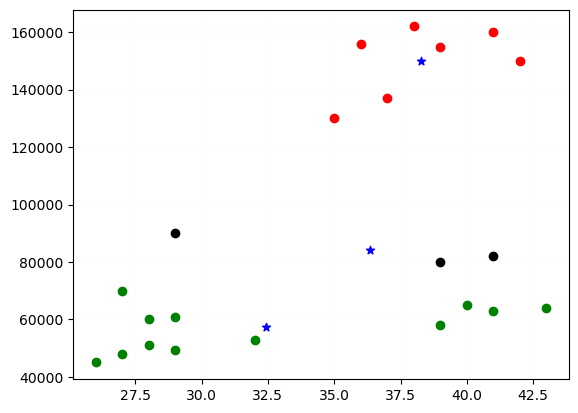

In [260]:
df1 = df[df["cluster"]==0]
df2 = df[df["cluster"]==1]
df3 = df[df["cluster"]==2]

plt.scatter(df1.age, df1.income, color="red")
plt.scatter(df2.age, df2.income, color="green")
plt.scatter(df3.age, df3.income, color="black")
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color="blue", marker="*")
plt.grid(True, linewidth=0.1, alpha=0.1, color="grey")
plt.show()

In [261]:
# As we can observe, our algorithm has done a terrible job at clustering the data points
# The centroid for cluster=1, seems alright but the other 2 cluster centers are out of place

In [262]:
#Let us apply Kmeans++ to our algorithm and observe if the model improves
# Kmeans++ is a parameter through which we instruct the Kmeans algorithm to pick the k random points as far away from each other as possible

## Introducing k-means++ parameter into the algorithm

In [264]:
km = KMeans(n_clusters=3, init="k-means++")
cols=df[["age", "income"]]
y_predict = km.fit_predict(cols)

In [265]:
df["cluster"] = y_predict

In [266]:
df.head()

,age,income,cluster
0,27,70000,2
1,29,90000,0
2,29,61000,2
3,28,60000,2
4,42,150000,1


## Visualizing the predicted clusters

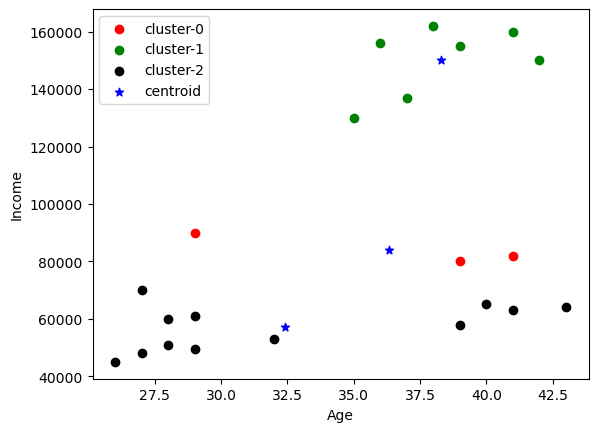

In [268]:
df1 = df[df["cluster"]==0]
df2 = df[df["cluster"]==1]
df3 = df[df["cluster"]==2]

plt.scatter(df1.age, df1.income, color="red", label="cluster-0")
plt.scatter(df2.age, df2.income, color="green", label="cluster-1")
plt.scatter(df3.age, df3.income, color="black", label="cluster-2")
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color="blue", marker="*", label="centroid")
plt.grid(True, linewidth=0.1, alpha=0.1, color="grey")
plt.xlabel("Age")
plt.ylabel("Income")
plt.legend()
plt.show()

In [269]:
#It appears that even k-means++ cannot get our centroids in order
#We need to normalize the data

## Scaling the data

In [271]:
from sklearn.preprocessing import StandardScaler

In [272]:
scaler = StandardScaler()

In [273]:
df["age"] = scaler.fit_transform(df[["age"]])
df["income"] = scaler.fit_transform(df[["income"]])

In [274]:
df.head()

,age,income,cluster
0,-1.356055,-0.480684,2
1,-1.009157,-0.010159,0
2,-1.009157,-0.692421,2
3,-1.182606,-0.715947,2
4,1.245679,1.401417,1


## Implementing the model on scaled data

In [276]:
km = KMeans(n_clusters=3, init="k-means++")
cols=df[["age", "income"]]
y_predict = km.fit_predict(cols)

In [277]:
df["cluster"] = y_predict

In [278]:
df.head()

,age,income,cluster
0,-1.356055,-0.480684,0
1,-1.009157,-0.010159,0
2,-1.009157,-0.692421,0
3,-1.182606,-0.715947,0
4,1.245679,1.401417,1


## Visualizing the predicted clusters for the scaled data

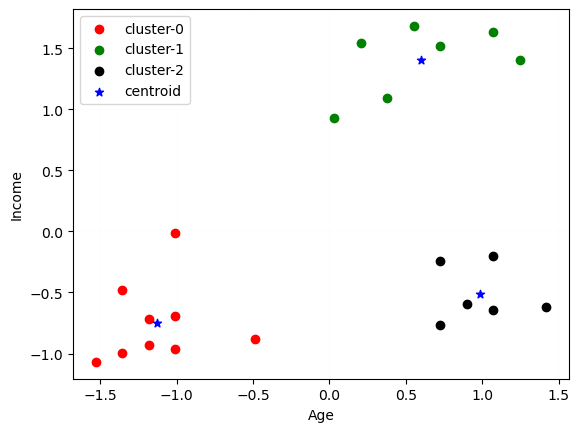

In [280]:
df1 = df[df["cluster"]==0]
df2 = df[df["cluster"]==1]
df3 = df[df["cluster"]==2]

plt.scatter(df1.age, df1.income, color="red", label="cluster-0")
plt.scatter(df2.age, df2.income, color="green", label="cluster-1")
plt.scatter(df3.age, df3.income, color="black", label="cluster-2")
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color="blue", marker="*", label="centroid")
plt.grid(True, linewidth=0.1, alpha=0.1, color="grey")
plt.xlabel("Age")
plt.ylabel("Income")
plt.legend()
plt.show()

In [281]:
# Scaling the data has sorted our incorrectly classified centroids